# ALeRCE classes

https://github.com/ZwickyTransientFacility/ztf-avro-alert

1. **AGN:** Active Galactic Nuclei
1. **Blazar:** Blazar
1. **CV/Nova:** Cataclysmic Variable Star/Nova
1. **Ceph: Cepheid Variable Star**
1. **DSCT: Delta Scuti Star**
1. **EA:** Eclipsing Algol
1. **EB/EW: Eclipsing Binaries/Eclipsing W Ursa Majoris**
1. **LPV: Long Period Variable**
1. **Periodic-Other:** Periodic-Other
1. **QSO:** Quasi-Stellar Object
1. **RRL: RRLyrae Variable Star**
1. **RSCVn:** RS Canum Venaticorum
1. **SLSN:** Super Luminous Supernova
1. **SNII:** Supernova II
1. **SNIIb:** Supernova IIb
1. **SNIIn:** Supernova IIn
1. **SNIa:** Supernova Ia
1. **SNIbc:** Supernova Ibc
1. **TDE:** Tidal disruption event (to remove)
1. **YSO:** Young Stellar Object
1. **ZZ:** ZZ Ceti Stars (to remove)

# Columns names
1. **oid:** object id
1. **classALeRCE:** object class name
1. **fid:** band index, g=1, r=2
1. **mjd:** observation day in mjd format
1. **magpsf_corr:** observations in aparent magnitude
1. **sigmapsf_corr:** observation errors in aparent magnitude

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [2]:
import numpy as np
import pandas as pd
            
#survey_name = 'alerceZTFv5.1'
survey_name = 'alerceZTFv7.1' # use this dataset

### load files
load_root_dir = f'../data/{survey_name}'
labels_df = pd.read_parquet(f'{load_root_dir}/labels_vs.parquet')
print(f'labels_df; columns={list(labels_df.columns)}; id={labels_df.index.name}')
detections_df = pd.read_parquet(f'{load_root_dir}/detections_vs.parquet')
print(f'detections_df; columns={list(detections_df.columns)}; id={detections_df.index.name}')

### print info
classes = set(labels_df['classALeRCE'].values)
print(f'classes={classes}')

labels_df; columns=['classALeRCE', 'ra', 'dec', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec']; id=oid
detections_df; columns=['fid', 'mjd', 'magpsf_corr', 'sigmapsf_corr']; id=oid
classes={'DSCT', 'RRL', 'LPV', 'Ceph', 'EB/EW'}


In [3]:
%load_ext autoreload
%autoreload 2
from vstars.level_bars import LevelBar

classes, counts = np.unique(labels_df['classALeRCE'].values, return_counts=True)
population_cdict = {c:counts[kc] for kc,c in enumerate(classes)}
print(LevelBar(population_cdict, ncols=60))

<tqdm.std.tqdm object at 0x7f25cbdddb10> Ceph - 665/82,237 (0.81%)
<tqdm.std.tqdm object at 0x7f26585253d0> DSCT - 804/82,237 (0.98%)
<tqdm.std.tqdm object at 0x7f25ca149150> EB/EW - 32,825/82,237 (39.92%)
<tqdm.std.tqdm object at 0x7f26585253d0> LPV - 13,403/82,237 (16.30%)
<tqdm.std.tqdm object at 0x7f25cbdddb10> RRL - 34,540/82,237 (42.00%)



In [4]:
print(detections_df.info())
detections_df[:20]

<class 'pandas.core.frame.DataFrame'>
Index: 2667429 entries, ZTF17aaafyya to ZTF20abceckn
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   fid            int64  
 1   mjd            float64
 2   magpsf_corr    float64
 3   sigmapsf_corr  float64
dtypes: float64(3), int64(1)
memory usage: 101.8+ MB
None


,fid,mjd,magpsf_corr,sigmapsf_corr
oid,,,,
ZTF17aaafyya,1,58791.283368,15.262989,0.004987
ZTF17aaafyya,1,59081.470544,15.281165,0.007919
ZTF17aaafyya,1,59067.403970,15.245437,0.000493
ZTF17aaafyya,1,58793.249965,15.205705,0.010043
ZTF17aaafyya,1,58793.239028,15.228786,0.009911
ZTF17aaafyya,1,58747.324676,15.226640,0.009151
ZTF17aaafyya,1,58334.472708,15.233562,0.009774
ZTF17aaafyya,1,58677.470833,15.276610,0.009193
ZTF17aaafyya,1,58332.463079,15.212075,0.003076


In [5]:
print(labels_df.info())
labels_df[:20]

<class 'pandas.core.frame.DataFrame'>
Index: 82237 entries, ZTF18abwwdsc to ZTF18abgqxlw
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   classALeRCE        82237 non-null  object 
 1   ra                 82237 non-null  float64
 2   dec                82237 non-null  float64
 3   period             59854 non-null  object 
 4   source             82237 non-null  object 
 5   id_source          82237 non-null  object 
 6   class_source       82237 non-null  object 
 7   separation_arcsec  82237 non-null  float64
dtypes: float64(3), object(5)
memory usage: 5.6+ MB
None


,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF18abwwdsc,Ceph,326.755845,-8.060673,2.18895,CRTSnorth,1007116010622.0,Cep-II,0.676851
ZTF18aaakigd,Ceph,65.440016,34.069809,2.11360,CRTSnorth,1135020009815.0,ACEP,0.390734
ZTF18aaavkyj,Ceph,192.885044,24.122642,1.09572,CRTSnorth,1123064031941.0,ACEP,0.291110
ZTF18abwwdxw,Ceph,324.865973,-17.296145,1.11714,CRTSnorth,1018112055304.0,ACEP,1.881608
ZTF19aaocniv,Ceph,248.580619,-16.015739,1.3049582,CRTSnorth,1015086048064.0,Cep-II,0.405458
ZTF17aacemqz,Ceph,117.977671,27.561363,16.2488,CRTSnorth,1126038065052.0,Cep-II,1.092943
ZTF18aaiyfjx,Ceph,245.464370,38.909590,1.04986,CRTSnorth,1138071060852.0,Cep-II,0.610218
ZTF19aaczymt,Ceph,228.810756,-14.901231,4.3680244,CRTSnorth,1015079060794.0,Cep-II,0.422664
ZTF18abvpirg,Ceph,351.955300,-9.388094,119.947,CRTSnorth,1009125035570.0,Cep-II,0.266861


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


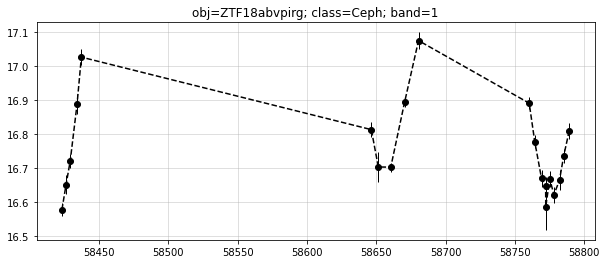

classALeRCE                     Ceph
ra                          351.9553
dec                        -9.388094
period                       119.947
source                     CRTSnorth
id_source            1009125035570.0
class_source                  Cep-II
separation_arcsec           0.266861
Name: ZTF18abvpirg, dtype: object
              fid           mjd  magpsf_corr  sigmapsf_corr
oid                                                        
ZTF18abvpirg    1  58429.207338    16.720863       0.021344
ZTF18abvpirg    1  58423.215370    16.577658       0.018441
ZTF18abvpirg    1  58760.337361    16.890135       0.017367
ZTF18abvpirg    1  58426.207338    16.651241       0.028777
ZTF18abvpirg    1  58646.441296    16.812499       0.021536
ZTF18abvpirg    1  58772.286528    16.586371       0.068318
ZTF18abvpirg    1  58670.439884    16.893030       0.015404
ZTF18abvpirg    1  58785.215984    16.735077       0.020320
ZTF18abvpirg    1  58660.458634    16.702378       0.012981
ZTF18abvpi

In [6]:
%load_ext autoreload
%autoreload 2
from vstars import _C
from vstars.utils import get_object
import matplotlib.pyplot as plt
from dask import dataframe as dd

### example using dask
detections_ddf = dd.from_pandas(detections_df, npartitions=_C.N_DASK) # dask dataframe can be faster
labels_ddf = dd.from_pandas(labels_df, npartitions=_C.N_DASK) # dask dataframe can be faster
obj_name = 'ZTF18abvpirg'
band = 1
days, obs, obs_error, c = get_object(detections_ddf, labels_ddf, obj_name, band)

color = 'k'
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(days, obs, 'o--', c=color)
ax.errorbar(days, obs, yerr=obs_error, color=color, capsize=0, elinewidth=1, linewidth=0)
ax.set_title(f'obj={obj_name}; class={c}; band={band}')
ax.grid(alpha=0.5)
plt.show()
print(labels_df.loc[obj_name])
print(detections_df.loc[obj_name])